# DSCI 510 Project
<b> Submission 2 (due April 14) </b>

---
Name: Brandon De Bruhl 
Date: 04/12/2023
Class: DSCI 510
Assignment: Part 2 - Project 

---
I am recreating a graph used in the economist magazaine to recreate the graph using python. Using the wayback machine, I found the orginal data set as a HTML file and will use that outdata set of informaiton to reproduce the chart. Further, the most updated informaiton is housed in PDF which turned out to be diffcult to capture so I am going to use the old data from Harvad which was the orginal source for the article. 

* Original Artilce: https://www.economist.com/graphic-detail/2015/09/17/the-innovation-game

* HTML Data Webstie: https://web.archive.org/web/20160518123907/http://tutorials.iq.harvard.edu/R/Rgraphics/dataSets/EconomistData.csv



## Install Packages 
I use a number of packages listed...

In [ ]:
import pandas as pd
import requests
import re
import io
from tabulate import tabulate
import wbdata
import datetime
import matplotlib.pyplot as plt

## (a) Scraping of the data, show code and sample data.

In [24]:
url = "https://web.archive.org/web/20160518123907/http://tutorials.iq.harvard.edu/R/Rgraphics/dataSets/EconomistData.csv"

# Send a request to the URL and get the content
response = requests.get(url)
content = response.content.decode("utf-8")
csv_data = re.findall(r'(".*?")', content, re.DOTALL)

csv_data_combined = "\n".join(csv_data)


data = pd.read_csv(io.StringIO(csv_data_combined), names=["", "Country", "HDI.Rank", "HDI", "CPI", "Region"])


print(tabulate(df.head(10), headers='keys', tablefmt='psql'))

+----+--------------+-------------+------------+-------+-------+-------------------+
|    |   Unnamed: 0 | Country     |   HDI.Rank |   HDI |   CPI | Region            |
|----+--------------+-------------+------------+-------+-------+-------------------|
|  0 |            1 | Afghanistan |        172 | 0.398 |   1.5 | Asia Pacific      |
|  1 |            2 | Albania     |         70 | 0.739 |   3.1 | East EU Cemt Asia |
|  2 |            3 | Algeria     |         96 | 0.698 |   2.9 | MENA              |
|  3 |            4 | Angola      |        148 | 0.486 |   2   | SSA               |
|  4 |            5 | Argentina   |         45 | 0.797 |   3   | Americas          |
|  5 |            6 | Armenia     |         86 | 0.716 |   2.6 | East EU Cemt Asia |
|  6 |            7 | Australia   |          2 | 0.929 |   8.8 | Asia Pacific      |
|  7 |            8 | Austria     |         19 | 0.885 |   7.8 | EU W. Europe      |
|  8 |            9 | Azerbaijan  |         91 | 0.7   |   2.4 | 

I use the HTML from the way back machine to access the data. However, I got a lot of errors when I tried to move it into a data frame. However, I have moved the scraped data into a GitHub repository and then will access that repository for the development of the graph replication. 

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/ProfBDB/Python_Projects/main/Economist.csv")
print(tabulate(df.head(10), headers='keys', tablefmt='psql'))

+----+--------------+-------------+------------+-------+-------+-------------------+
|    |   Unnamed: 0 | Country     |   HDI.Rank |   HDI |   CPI | Region            |
|----+--------------+-------------+------------+-------+-------+-------------------|
|  0 |            1 | Afghanistan |        172 | 0.398 |   1.5 | Asia Pacific      |
|  1 |            2 | Albania     |         70 | 0.739 |   3.1 | East EU Cemt Asia |
|  2 |            3 | Algeria     |         96 | 0.698 |   2.9 | MENA              |
|  3 |            4 | Angola      |        148 | 0.486 |   2   | SSA               |
|  4 |            5 | Argentina   |         45 | 0.797 |   3   | Americas          |
|  5 |            6 | Armenia     |         86 | 0.716 |   2.6 | East EU Cemt Asia |
|  6 |            7 | Australia   |          2 | 0.929 |   8.8 | Asia Pacific      |
|  7 |            8 | Austria     |         19 | 0.885 |   7.8 | EU W. Europe      |
|  8 |            9 | Azerbaijan  |         91 | 0.7   |   2.4 | 

In [24]:
# Fetch GDP data from the World Bank API
data_date = datetime.datetime(2011, 1, 1)
gdp_data = wbdata.get_data("NY.GDP.MKTP.CD", data_date=data_date)
gdp_data_df = pd.DataFrame(gdp_data)

# Clean and format the GDP data
gdp_data_df = gdp_data_df[['countryiso3code', 'value']].dropna()
gdp_data_df.columns = ['iso3', 'GDP']

print(gdp_data_df.head())

  iso3           GDP
0  AFE  9.642130e+11
1  AFW  6.804560e+11
2  ARB  2.541860e+12
3  CSS  7.008317e+10
4  CEB  1.455318e+12


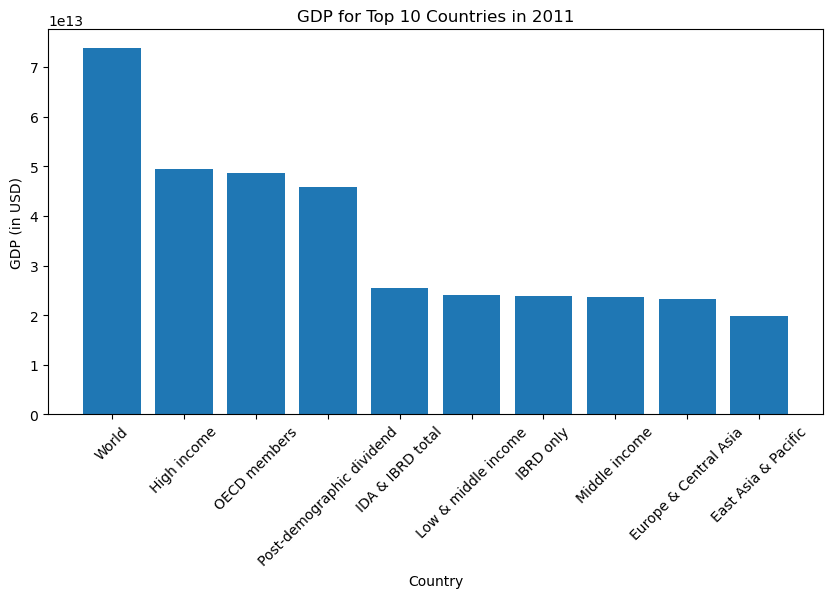

In [27]:
# Fetch GDP data from the World Bank API
data_date = datetime.datetime(2011, 1, 1)
gdp_data = wbdata.get_data("NY.GDP.MKTP.CD", data_date=data_date)
gdp_data_df = pd.DataFrame(gdp_data)


gdp_data_df = gdp_data_df[['countryiso3code', 'country', 'value']].dropna()
gdp_data_df.columns = ['iso3', 'country', 'GDP']

gdp_data_df = gdp_data_df.sort_values(by='GDP', ascending=False).head(10)

# Create a bar chart of GDP data for the top 10 countries
plt.figure(figsize=(10, 5))
plt.bar(gdp_data_df['country'].str['value'], gdp_data_df['GDP'])
plt.xlabel('Country')
plt.ylabel('GDP (in USD)')
plt.title('GDP for Top 10 Countries in 2011')
plt.xticks(rotation=45)
plt.show()

This dataset contains information on various countries, including their Human Development Index (HDI) rank, HDI, Corruption Perceptions Index (CPI), and region.

* The HDI is a composite statistic of life expectancy, education, and per capita income, used to rank countries into four tiers of human development. The HDI rank is the country's position in the HDI ranking. The higher the HDI and HDI rank, the more developed the country.

* The CPI is a measure of perceived corruption in the public sector, with higher scores indicating lower levels of corruption.

* The dataset also includes the region to which the country belongs.

This data can be used to analyze the relationship between a country's level of development and its perceived level of corruption, as well as how these factors differ by region.

In [26]:
# Specify the indicators
indicators = {
    'GB.XPD.RSDV.GD.ZS': 'R&D Expenditure (% of GDP)',
    'TX.VAL.TECH.MF.ZS': 'High-tech Exports (% of Manufactured Exports)'
}

# Fetch data from the World Bank API
data_date = datetime.datetime(2011, 1, 1)
innovation_data = wbdata.get_dataframe(indicators, data_date=data_date)

# Reset the index and clean the data
innovation_data.reset_index(inplace=True)
innovation_data.dropna(subset=['R&D Expenditure (% of GDP)', 'High-tech Exports (% of Manufactured Exports)'], how='all', inplace=True)

print(innovation_data.head())


                          country  R&D Expenditure (% of GDP)  \
1      Africa Western and Central                         NaN   
2                      Arab World                    0.559007   
4  Central Europe and the Baltics                    0.954758   
5      Early-demographic dividend                    0.719676   
6             East Asia & Pacific                    2.329269   

   High-tech Exports (% of Manufactured Exports)  
1                                       2.702899  
2                                            NaN  
4                                      12.953166  
5                                       7.997441  
6                                      27.583241  


## (b) Model data into Schema...
The diagram to show how the data joins across sources. The diagram should be an
Entity-Relation diagram (no need to be fully formal) or just a set of tables
showing how the data relates across the tables.

In this diagram, the EconomistData table, WorldBankGDP table, and WorldBankInnovation table are connected using the ISO3 country code as the common field between them. The arrows indicate the relationships between the tables, with the ISO3 field serving as the linking point.

In [ ]:
+----------------+      +--------------+
| EconomistData  |      | WorldBankGDP |
+----------------+      +--------------+
| id (PK, INT)   |      | id (PK, INT) |
| country (TEXT) |      | ISO3 (TEXT)  |<----+
| ISO3 (TEXT)    |----->| GDP (REAL)   |     |
+----------------+      +--------------+     |
                                             |
+--------------------------+                 |
| WorldBankInnovation      |                 |
+--------------------------+                 |
| id (PK, INT)             |                 |
| ISO3 (TEXT)              |<----------------+
| R&D_expenditure (REAL)   |
| high_tech_exports (REAL) |
+--------------------------+

he ISO3 country codes, also known as ISO 3166-1 alpha-3 codes, are three-letter codes that uniquely represent countries and dependent territories. They are defined by the International Organization for Standardization (ISO).

Here's a link to a list of ISO 3166-1 alpha-3 codes on Wikipedia:

ISO 3166-1 alpha-3 - Wikipedia

This page provides an extensive list of countries along with their respective three-letter ISO 3166-1 alpha-3 codes.